## Data Import

In [ ]:
from google.colab import drive
import pandas as pd
import numpy as np
import seaborn as sns
import re
from collections import Counter
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df_whole = pd.read_csv('/content/drive/MyDrive/DSO 574/Assignment 3/Database/ReelGood Data/Reel Good Data (Title+Service+Genre+Tag List).csv', index_col=0)

<ipython-input-22-00bcfcd6c8fe>:1: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  df_whole = pd.read_csv('/content/drive/MyDrive/DSO 574/Assignment 3/Database/ReelGood Data/Reel Good Data (Title+Service+Genre+Tag List).csv', index_col=0)


In [ ]:
df_whole.shape

(287834, 18)

In [ ]:
df_whole.columns

Index(['Title', 'URL', 'Type', 'Service', 'Genre', 'Tag', 'IMDB', 'ReelGood',
       'AgeRating', 'Rated', 'Released Year', 'Duration Year', 'Seasons',
       'What it's about', 'Where to Watch', 'Rent or Buy Available',
       'Exclusive Service', 'Has Tag'],
      dtype='object')

In [ ]:
df_whole[df_whole['Title'] == 'The Big Bang Theory']

,Title,URL,Type,Service,Genre,Tag,IMDB,ReelGood,AgeRating,Rated,Released Year,Duration Year,Seasons,What it's about,Where to Watch,Rent or Buy Available,Exclusive Service,Has Tag
302,The Big Bang Theory,/show/the-big-bang-theory-2007,tv,hbo_max,Romance,"['Science', 'Friendship', 'Science', 'Friendsh...",8.1,90.0,16+,TV-14,2007,2007-2020,12.0,The Big Bang Theory is centered on five charac...,279 episodes (99%) are available to stream on ...,1,0,1
303,The Big Bang Theory,/show/the-big-bang-theory-2007,tv,hbo_max,Comedy,"['Science', 'Friendship', 'Science', 'Friendsh...",8.1,90.0,16+,TV-14,2007,2007-2020,12.0,The Big Bang Theory is centered on five charac...,279 episodes (99%) are available to stream on ...,1,0,1
304,The Big Bang Theory,/show/the-big-bang-theory-2007,tv,hulu_plus,Romance,"['Science', 'Friendship', 'Science', 'Friendsh...",8.1,90.0,16+,TV-14,2007,2007-2020,12.0,The Big Bang Theory is centered on five charac...,279 episodes (99%) are available to stream on ...,1,0,1
305,The Big Bang Theory,/show/the-big-bang-theory-2007,tv,hulu_plus,Comedy,"['Science', 'Friendship', 'Science', 'Friendsh...",8.1,90.0,16+,TV-14,2007,2007-2020,12.0,The Big Bang Theory is centered on five charac...,279 episodes (99%) are available to stream on ...,1,0,1
306,The Big Bang Theory,/show/the-big-bang-theory-2007,tv,tbs,Romance,"['Science', 'Friendship', 'Science', 'Friendsh...",8.1,90.0,16+,TV-14,2007,2007-2020,12.0,The Big Bang Theory is centered on five charac...,279 episodes (99%) are available to stream on ...,1,0,1
307,The Big Bang Theory,/show/the-big-bang-theory-2007,tv,tbs,Comedy,"['Science', 'Friendship', 'Science', 'Friendsh...",8.1,90.0,16+,TV-14,2007,2007-2020,12.0,The Big Bang Theory is centered on five charac...,279 episodes (99%) are available to stream on ...,1,0,1


# EDA and Data Preprocessing

In [ ]:
df_whole.head(5)

,Title,URL,Type,Service,Genre,Tag,IMDB,ReelGood,AgeRating,Rated,Released Year,Duration Year,Seasons,What it's about,Where to Watch,Rent or Buy Available,Exclusive Service,Has Tag
0,Breaking Bad,/show/breaking-bad-2008,tv,netflix,Crime,"['Drug', 'Doctor', 'Teacher', 'Gangster', 'Hig...",9.5,100.0,18+,TV-MA,2008,2008-2020,5.0,"When Walter White, a New Mexico chemistry teac...",62 episodes (100%) are available to stream on ...,1,0,1
1,Breaking Bad,/show/breaking-bad-2008,tv,netflix,Drama,"['Drug', 'Doctor', 'Teacher', 'Gangster', 'Hig...",9.5,100.0,18+,TV-MA,2008,2008-2020,5.0,"When Walter White, a New Mexico chemistry teac...",62 episodes (100%) are available to stream on ...,1,0,1
2,Game of Thrones,/show/game-of-thrones-2011,tv,hbo_max,Drama,"['War', 'Royalty', 'Political', 'Based on Book...",9.3,98.0,18+,TV-MA,2011,2011-2020,8.0,Seven noble families fight for control of the ...,74 episodes (100%) are available to stream on ...,1,0,1
3,Game of Thrones,/show/game-of-thrones-2011,tv,hbo_max,Action & Adventure,"['War', 'Royalty', 'Political', 'Based on Book...",9.3,98.0,18+,TV-MA,2011,2011-2020,8.0,Seven noble families fight for control of the ...,74 episodes (100%) are available to stream on ...,1,0,1
4,Game of Thrones,/show/game-of-thrones-2011,tv,hbo_max,Fantasy,"['War', 'Royalty', 'Political', 'Based on Book...",9.3,98.0,18+,TV-MA,2011,2011-2020,8.0,Seven noble families fight for control of the ...,74 episodes (100%) are available to stream on ...,1,0,1


In [ ]:
df_whole.isnull().sum()

Title                         0
URL                           0
Type                          0
Service                       0
Genre                         0
Tag                           0
IMDB                       4522
ReelGood                    930
AgeRating                121637
Rated                    190270
Released Year                 0
Duration Year            264763
Seasons                  264787
What it's about          139788
Where to Watch           153673
Rent or Buy Available         0
Exclusive Service             0
Has Tag                       0
dtype: int64

Focus on TV only + top 20 streaming platform

In [ ]:
df = df_whole[df_whole['Type'] == 'tv']
df = df.drop_duplicates(subset=df_whole.columns.difference(
                        ['URL', 'Tag', 'IMDB', 'ReelGood' , 'AgeRating', 'Rated',
                         'Released Year', 'Duration Year', 'Seasons', 'What it\'s about',
                         'Where to Watch', 'Rent or Buy Available', 'Exclusive Service',
                         'Has Tag']))

In [ ]:
df.shape

(50485, 18)

In [ ]:
# We observed there are null values in the data but it is not problematic at this point so we are not eliminating them
df_whole.isnull().sum()

Title                         0
URL                           0
Type                          0
Service                       0
Genre                         0
Tag                           0
IMDB                       4522
ReelGood                    930
AgeRating                121637
Rated                    190270
Released Year                 0
Duration Year            264763
Seasons                  264787
What it's about          139788
Where to Watch           153673
Rent or Buy Available         0
Exclusive Service             0
Has Tag                       0
dtype: int64

In [ ]:
df.groupby(['Service']).size().sort_values(ascending=False).head(25)

Service
free                          7581
netflix                       4225
hulu_plus                     3579
Rent or Buy                   3213
amazon_prime                  2901
philo                         2792
fubo_tv                       2522
tubi_tv                       2428
hoopla                        1738
crunchyroll_free              1690
funimation                    1610
hbo_max                        974
plutotv                        956
imdb_tv                        718
disney_plus                    595
cbs_all_access                 570
investigation_discovery_go     569
britbox                        488
peacock_free                   477
acorntv                        443
plex_free                      442
hbo                            437
vudu_free                      371
starz                          371
crunchyroll_premium            322
dtype: int64

We found there are "free" and "Rent or Buy" which aren't our target customers (streaming platform). However, it might be useful for question 2 (minor/potential market).

In [ ]:
df[df['Service'] == 'Rent or Buy']

,Title,URL,Type,Service,Genre,Tag,IMDB,ReelGood,AgeRating,Rated,Released Year,Duration Year,Seasons,What it's about,Where to Watch,Rent or Buy Available,Exclusive Service,Has Tag
1010,Utopia,/show/utopia-2013,tv,Rent or Buy,Reality,"['Doctor', 'Science']",8.4,79.0,18+,TV-MA,2013,2013-2020,2.0,The Utopia Experiments is a legendary graphic...,12 episodes (67%) are available to rent or buy...,1,1,1
1011,Utopia,/show/utopia-2013,tv,Rent or Buy,Drama,"['Doctor', 'Science']",8.4,79.0,18+,TV-MA,2013,2013-2020,2.0,The Utopia Experiments is a legendary graphic...,12 episodes (67%) are available to rent or buy...,1,1,1
1012,Utopia,/show/utopia-2013,tv,Rent or Buy,Mystery,"['Doctor', 'Science']",8.4,79.0,18+,TV-MA,2013,2013-2020,2.0,The Utopia Experiments is a legendary graphic...,12 episodes (67%) are available to rent or buy...,1,1,1
1251,Castle,/show/castle-2009,tv,Rent or Buy,Crime,"['Disney', 'Police', 'New York']",8.1,83.0,16+,TV-14,2009,2009-2020,8.0,After a serial killer imitates the plots of hi...,NaN,1,1,1
1252,Castle,/show/castle-2009,tv,Rent or Buy,Drama,"['Disney', 'Police', 'New York']",8.1,83.0,16+,TV-14,2009,2009-2020,8.0,After a serial killer imitates the plots of hi...,NaN,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50658,Kid President: Declaration of Awesome,/show/kid-president-declaration-of-awesome-2014,tv,Rent or Buy,Documentary,[nan],NaN,NaN,NaN,NaN,2014,NaN,NaN,NaN,NaN,1,1,0
50661,Armed & Ready,/show/armed-ready-2013,tv,Rent or Buy,Reality,[nan],NaN,NaN,NaN,NaN,2013,NaN,NaN,NaN,NaN,1,1,0
50662,Armed & Ready,/show/armed-ready-2013,tv,Rent or Buy,Travel,[nan],NaN,NaN,NaN,NaN,2013,NaN,NaN,NaN,NaN,1,1,0
50663,Armed & Ready,/show/armed-ready-2013,tv,Rent or Buy,Documentary,[nan],NaN,NaN,NaN,NaN,2013,NaN,NaN,NaN,NaN,1,1,0


### Top 20 Platform

In [ ]:
## Top 20 platform

top_20 = ['netflix', 'hulu_plus', 'amazon_prime', 'philo', 'fubo_tv', 'tubi_tv', 'hoopla',
 'crunchyroll_free', 'funimation', 'hbo_max', 'plutotv', 'imdb_tv', 'disney_plus',
 'cbs_all_access', 'investigation_discovery_go', 'britbox', 'peacock_free', 'acorntv',
 'plex_free', 'hbo']

In [ ]:
top_20_platform_df = df[df['Service'].isin(top_20)]

In [ ]:
top_20_platform_df['Genre'].value_counts()

Genre
Drama                 3921
Comedy                3414
Action & Adventure    3053
Documentary           3030
Animation             2980
Reality               2521
Crime                 1973
Family                1521
Anime                 1137
Children               886
Mystery                767
Fantasy                698
Romance                649
Science-Fiction        593
Thriller               420
History                417
Food                   377
Game Show              363
Home & Garden          334
Horror                 272
Travel                 218
Sport                  211
Biography              174
LGBTQ                   86
Musical                 86
Stand-up & Talk         38
Cult                    15
Name: count, dtype: int64

In [ ]:
top_20_platform_df.groupby(['Service']).mean(['IMDB'])[['IMDB', 'ReelGood']].sort_values(['IMDB'], ascending = False)

,IMDB,ReelGood
Service,,
hbo,7.523023,62.505747
britbox,7.519462,56.415984
hbo_max,7.491060,62.793422
acorntv,7.476136,53.902935
investigation_discovery_go,7.275285,38.640708
imdb_tv,7.226294,57.211699
netflix,7.147528,57.678977
hulu_plus,7.138237,59.622030
amazon_prime,7.136324,50.882026


In [ ]:
top_20_platform_df.groupby(['Genre']).mean(['IMDB'])[['IMDB', 'ReelGood']].sort_values(['IMDB'], ascending = False)

,IMDB,ReelGood
Genre,,
LGBTQ,7.618605,67.767442
Biography,7.550000,51.522989
Cult,7.546667,64.866667
History,7.527317,50.249395
Crime,7.369465,54.236936
Sport,7.362312,51.937198
Thriller,7.311031,61.261905
Drama,7.298701,58.519020
Anime,7.285333,58.152155


## Question 3 (Successful TV shows)

In [ ]:
df.head(5)

,Title,URL,Type,Service,Genre,Tag,IMDB,ReelGood,AgeRating,Rated,Released Year,Duration Year,Seasons,What it's about,Where to Watch,Rent or Buy Available,Exclusive Service,Has Tag
0,Breaking Bad,/show/breaking-bad-2008,tv,netflix,Crime,"['Drug', 'Doctor', 'Teacher', 'Gangster', 'Hig...",9.5,100.0,18+,TV-MA,2008,2008-2020,5.0,"When Walter White, a New Mexico chemistry teac...",62 episodes (100%) are available to stream on ...,1,0,1
1,Breaking Bad,/show/breaking-bad-2008,tv,netflix,Drama,"['Drug', 'Doctor', 'Teacher', 'Gangster', 'Hig...",9.5,100.0,18+,TV-MA,2008,2008-2020,5.0,"When Walter White, a New Mexico chemistry teac...",62 episodes (100%) are available to stream on ...,1,0,1
2,Game of Thrones,/show/game-of-thrones-2011,tv,hbo_max,Drama,"['War', 'Royalty', 'Political', 'Based on Book...",9.3,98.0,18+,TV-MA,2011,2011-2020,8.0,Seven noble families fight for control of the ...,74 episodes (100%) are available to stream on ...,1,0,1
3,Game of Thrones,/show/game-of-thrones-2011,tv,hbo_max,Action & Adventure,"['War', 'Royalty', 'Political', 'Based on Book...",9.3,98.0,18+,TV-MA,2011,2011-2020,8.0,Seven noble families fight for control of the ...,74 episodes (100%) are available to stream on ...,1,0,1
4,Game of Thrones,/show/game-of-thrones-2011,tv,hbo_max,Fantasy,"['War', 'Royalty', 'Political', 'Based on Book...",9.3,98.0,18+,TV-MA,2011,2011-2020,8.0,Seven noble families fight for control of the ...,74 episodes (100%) are available to stream on ...,1,0,1


In [ ]:
df['Tag']

0        ['Drug', 'Doctor', 'Teacher', 'Gangster', 'Hig...
1        ['Drug', 'Doctor', 'Teacher', 'Gangster', 'Hig...
2        ['War', 'Royalty', 'Political', 'Based on Book...
3        ['War', 'Royalty', 'Political', 'Based on Book...
4        ['War', 'Royalty', 'Political', 'Based on Book...
                               ...                        
50671                                      [nan, nan, nan]
50672                                      [nan, nan, nan]
50673                                      [nan, nan, nan]
50674                                      [nan, nan, nan]
50675                                                [nan]
Name: Tag, Length: 50485, dtype: object

In [ ]:
df.dtypes

Title                     object
URL                       object
Type                      object
Service                   object
Genre                     object
Tag                       object
IMDB                     float64
ReelGood                 float64
AgeRating                 object
Rated                     object
Released Year              int64
Duration Year             object
Seasons                  float64
What it's about           object
Where to Watch            object
Rent or Buy Available      int64
Exclusive Service          int64
Has Tag                    int64
dtype: object

In [ ]:
df_whole.isnull().sum()

Title                         0
URL                           0
Type                          0
Service                       0
Genre                         0
Tag                           0
IMDB                       4522
ReelGood                    930
AgeRating                121637
Rated                    190270
Released Year                 0
Duration Year            264763
Seasons                  264787
What it's about          139788
Where to Watch           153673
Rent or Buy Available         0
Exclusive Service             0
Has Tag                       0
dtype: int64

In [ ]:
question3_df = df.groupby('Title').agg({
    'URL': 'first',
    'Type': 'first',
    'Service': lambda x: list(set(x)), # Check the TV show is available on which platforms
    'Genre': lambda x: list(set(x)),
    'Tag': 'first',
    'IMDB': 'mean',  # Mean IMDB rating
    'ReelGood': 'mean',  # Mean ReelGood rating
    'AgeRating': 'first',
    'Rated': 'first', # first IMDB rating
    'Released Year': 'first',  # first released year
    'Duration Year': 'first',  # first duration years
    'Seasons': 'max',  # Maximum number of seasons
    'What it\'s about': 'first',
    'Where to Watch': 'first',  # first 'Where to Watch' values
    'Rent or Buy Available': 'first',  # first of 'Rent or Buy Available' values
    'Exclusive Service': 'first',  # first non-null 'Exclusive Service' values
    'Has Tag': 'first'  # first of 'Has Tag' values
}).reset_index()

In [ ]:
import ast

# Function to safely convert string representation of lists to actual lists
def safe_literal_eval(x):
    try:
        return ast.literal_eval(x)
    except (SyntaxError, ValueError):
        return x

# Convert string representation of lists to actual lists
question3_df['Tag'] = question3_df['Tag'].apply(safe_literal_eval)

# Define a function to remove duplicates from a list
def remove_duplicates(lst):
    if isinstance(lst, list):
        return list(set(lst))
    else:
        return lst

# Apply the function to remove duplicates from each list in the 'Tag' column
question3_df['Tag'] = question3_df['Tag'].apply(remove_duplicates)

In [ ]:
question3_df.shape

(10771, 18)

In [ ]:
question3_df.isnull().sum()

Title                       0
URL                         0
Type                        0
Service                     0
Genre                       0
Tag                         0
IMDB                      633
ReelGood                  150
AgeRating                3516
Rated                    7319
Released Year               0
Duration Year            6592
Seasons                  6594
What it's about          6592
Where to Watch           7102
Rent or Buy Available       0
Exclusive Service           0
Has Tag                     0
dtype: int64

In [ ]:
## the null mostly is due to missing data
question3_df[question3_df['Seasons'].isna()].head(5)

,Title,URL,Type,Service,Genre,Tag,IMDB,ReelGood,AgeRating,Rated,Released Year,Duration Year,Seasons,What it's about,Where to Watch,Rent or Buy Available,Exclusive Service,Has Tag
0,#BlackLove,/show/blacklove-2015,tv,"[fyi_tveverywhere, fyi, plutotv, free]","[Romance, Reality, Drama]","[nan, nan, nan, nan]",6.1,37.0,16+,None,2015,None,NaN,None,None,1,0,0
1,"#MeToo, Now What?",/show/metoo-now-what-2018,tv,"[pbs, free, amazon_prime, hoopla]",[Documentary],"[nan, nan, nan, nan]",6.8,27.0,None,None,2018,None,NaN,None,None,1,0,0
2,#RichKids of Beverly Hills,/show/richkids-of-beverly-hills-2014,tv,[fubo_tv],[Reality],[nan],3.1,38.0,16+,None,2014,None,NaN,None,None,1,0,0
4,#killerpost,/show/killerpost-2016,tv,"[free, peacock_free]","[Documentary, Crime]","[nan, nan]",7.0,38.0,7+,None,2016,None,NaN,None,None,1,0,0
5,$100 Makeover,/show/100-makeover-2010,tv,"[plutotv, free]",[Reality],"[nan, nan]",NaN,38.0,None,None,2010,None,NaN,None,None,0,0,0


In [ ]:
question3_df.sort_values(by='IMDB', ascending=False, inplace=True)
question3_df.head(10)

,Title,URL,Type,Service,Genre,Tag,IMDB,ReelGood,AgeRating,Rated,Released Year,Duration Year,Seasons,What it's about,Where to Watch,Rent or Buy Available,Exclusive Service,Has Tag
1237,Bluey,/show/bluey-2018,tv,"[disneynow, free, fubo_tv, disneynow_free, dis...","[Children, Animation, Family]",[Video Games],9.7,66.0,all,TV-G,2018,2018-2020,3.0,Bluey is an inexhaustible six year-old Blue He...,6 episodes (7%) are available to watch free on...,1,0,1
5306,Malgudi Days,/show/malgudi-days-1987,tv,[amazon_prime],"[Comedy, Children, Drama, Family]",[nan],9.5,63.0,all,None,1987,None,NaN,None,None,1,0,0
8920,The Last Drive-in With Joe Bob Briggs,/show/the-last-drivein-with-joe-bob-briggs-2018,tv,[shudder],"[Cult, Comedy, Fantasy]",[nan],9.5,59.0,18+,None,2018,None,NaN,None,None,0,1,0
1336,Breaking Bad,/show/breaking-bad-2008,tv,[netflix],"[Drama, Crime]","[Gangster, High School, Doctor, Drug, Teacher]",9.5,100.0,18+,TV-MA,2008,2008-2020,5.0,"When Walter White, a New Mexico chemistry teac...",62 episodes (100%) are available to stream on ...,1,0,1
6575,Planet Earth II,/show/planet-earth-ii-2016,tv,[bbc_america_tve],[Documentary],"[Space, Animal, Jungle]",9.5,86.0,all,TV-G,2016,2016-2020,1.0,David Attenborough presents a documentary seri...,6 episodes (86%) are available to stream on a ...,1,0,1
662,Arnie,/show/arnie-2014,tv,"[free, peacock_free]","[Sport, Biography, Documentary]","[nan, nan]",9.4,43.0,None,None,2014,None,NaN,None,None,0,0,0
1678,Chernobyl,/show/chernobyl-2019,tv,"[hbo_max, hbo]","[History, Drama]","[Adaptation, Disaster, Based On True Story]",9.4,95.0,18+,TV-MA,2019,2019-2020,1.0,The true story of one of the worst man-made ca...,5 episodes (100%) are available to stream on a...,1,0,1
839,Band of Brothers,/show/band-of-brothers-2001,tv,"[hbo_max, hbo]","[Action & Adventure, Drama]","[Military, War, Based On True Story, Kidnappin...",9.4,92.0,18+,TV-MA,2001,2001-2020,1.0,Drawn from interviews with survivors of Easy C...,10 episodes (100%) are available to stream on ...,1,0,1
8869,The Joy of Painting,/show/the-joy-of-painting-1983,tv,"[tubi_tv, free, imdb_tv, hoopla]","[Reality, Documentary, Family]","[nan, nan, nan, nan]",9.4,64.0,all,None,1983,None,NaN,None,None,1,0,0
6574,Planet Earth,/show/planet-earth-2006,tv,[Rent or Buy],[Documentary],[Space],9.4,77.0,all,TV-G,2006,2006-2020,1.0,David Attenborough celebrates the amazing vari...,11 episodes (100%) are available to rent or bu...,1,1,1


In [ ]:
top_20 = ['netflix', 'hulu_plus', 'amazon_prime', 'philo', 'fubo_tv', 'tubi_tv', 'hoopla',
 'crunchyroll_free', 'funimation', 'hbo_max', 'plutotv', 'imdb_tv', 'disney_plus',
 'cbs_all_access', 'investigation_discovery_go', 'britbox', 'peacock_free', 'acorntv',
 'plex_free', 'hbo']

In [ ]:
Big_5 = ['netflix', 'hulu_plus', 'amazon_prime', 'philo', 'fubo_tv']

In [ ]:
Big_3 = ['netflix', 'hulu_plus', 'amazon_prime']

In [ ]:
test_filtered = question3_df[
    (
        (
            ((question3_df['IMDB'] >= 9.0) |
            (question3_df['ReelGood'] >= 85))
            #  &
            #  (question3_df['Service'].apply(lambda x: any(platform in x for platform in top_20)))
        )  |
        (question3_df['Seasons'] > 10.0)
    )
]
test_filtered

In [ ]:
filtered_question3_df = question3_df[
        (
            ((question3_df['Exclusive Service'] == 1) | (question3_df['Service'].apply(len) == 1) | (question3_df['Service'].apply(len) >= 5)) &
            (question3_df['Service'].apply(lambda x: any(platform in x for platform in Big_3))) &
            ((question3_df['IMDB'] >= 9.0) | (question3_df['ReelGood'] >= 85)) &
            (question3_df['Seasons'] >= 3.0)
         )]
filtered_question3_df

,Title,URL,Type,Service,Genre,Tag,IMDB,ReelGood,AgeRating,Rated,Released Year,Duration Year,Seasons,What it's about,Where to Watch,Rent or Buy Available,Exclusive Service,Has Tag
1336,Breaking Bad,/show/breaking-bad-2008,tv,[netflix],"[Drama, Crime]","[Gangster, High School, Doctor, Drug, Teacher]",9.5,100.0,18+,TV-MA,2008,2008-2020,5.0,"When Walter White, a New Mexico chemistry teac...",62 episodes (100%) are available to stream on ...,1,0,1
1920,Cosmos,/show/cosmos-a-spacetime-odyssey-2014,tv,"[natgeo, free, tubi_tv, fox, fox_tveverywhere,...",[Documentary],"[Space, Science]",9.3,82.0,all,TV-G,2014,2014-2020,3.0,Famed astrophysicist Neil deGrasse Tyson provi...,2 episodes (7%) are available to watch free on...,1,0,1
3969,Horsepower TV,/show/horsepower-2006,tv,[amazon_prime],[Sport],[Racing],9.2,38.0,all,TV-G,2006,2006-2020,9.0,Every gearhead wants power and this show revea...,14 episodes (8%) are available to stream on a ...,1,0,1
7003,Rick and Morty,/show/rick-and-morty-2013,tv,"[free, hulu_plus, hoopla, fubo_tv, adult_swim_...","[Comedy, Action & Adventure, Animation, Scienc...","[Time Travel, Space, Science, Alien]",9.2,96.0,18+,TV-MA,2013,2013-2020,4.0,Rick is a mentally-unbalanced but scientifical...,5 episodes (12%) are available to watch free o...,1,0,1
7483,Sherlock,/show/sherlock-2010,tv,[netflix],"[Action & Adventure, Drama, Crime]","[Based on Books, Adaptation, Serial Killer]",9.1,94.0,16+,TV-14,2010,2010-2020,4.0,A modern update finds the famous sleuth and hi...,12 episodes (92%) are available to stream on a...,1,0,1
3515,Gravity Falls,/show/gravity-falls-2012,tv,"[disneynow, free, disneynow_free, hulu_plus, d...","[Comedy, Action & Adventure, Fantasy, Animation]","[Supernatural, Disney]",8.9,87.0,7+,TV-PG,2012,2012-2020,3.0,Twin brother and sister Dipper and Mabel Pines...,2 episodes (5%) are available to watch free on...,1,0,1
709,Attack on Titan,/show/attack-on-titan-2013,tv,"[adult_swim_tveverywhere, crunchyroll_premium,...","[Action & Adventure, Animation, Anime]","[Supernatural, Dystopia, Monster, Political, A...",8.8,92.0,16+,TV-MA,2013,2013-2020,3.0,"Several hundred years ago, humans were nearly ...",59 episodes (98%) are available to watch free ...,1,0,1
4361,It's Always Sunny in Philadelphia,/show/its-always-sunny-in-philadelphia-2005,tv,"[philo, fx_tveverywhere, fox_tveverywhere, vic...",[Comedy],"[Friendship, Political]",8.8,90.0,18+,TV-MA,2005,2005-2020,15.0,Four egocentric friends who run a neighborhood...,146 episodes (95%) are available to stream on ...,1,0,1
9526,The West Wing,/show/the-west-wing-1999,tv,[netflix],[Drama],"[Political, Spy]",8.8,85.0,16+,TV-14,1999,1999-2020,7.0,The West Wing provides a glimpse into presiden...,155 episodes (100%) are available to stream on...,1,0,1
2128,Dark,/show/dark-2017,tv,[netflix],"[Mystery, Drama, Crime]","[Time Travel, Police]",8.8,94.0,16+,TV-14,2017,2017-2020,3.0,A missing child causes four families to help e...,26 episodes (100%) are available to stream on ...,0,1,1


In [ ]:
filtered_question3_df.shape

(57, 18)

In [ ]:
genres = [genre for sublist in filtered_question3_df['Genre'] if isinstance(sublist, list) for genre in sublist]

# Count the occurrence of each genre and tag
genre_counts = pd.Series(genres).value_counts()

# Display the counts
print("Genre Counts:")
print(genre_counts)

Genre Counts:
Drama                 37
Crime                 22
Action & Adventure    21
Comedy                16
Animation              9
Fantasy                9
Mystery                7
Science-Fiction        6
Thriller               6
Horror                 5
LGBTQ                  4
Anime                  2
Biography              2
History                2
Romance                2
Sport                  1
Documentary            1
Stand-up & Talk        1
Family                 1
Children               1
Name: count, dtype: int64


In [ ]:
# Initialize an empty dictionary to store the maximum IMDB score and corresponding title for each genre
max_imdb_by_genre = {}

# Iterate over each row in the DataFrame
for index, row in filtered_question3_df.iterrows():
    # Iterate over each genre in the 'Genre' list of the current row
    for genre in row['Genre']:
        # Check if the genre already exists in the dictionary
        if genre in max_imdb_by_genre:
            # If it exists, update the maximum IMDB score and corresponding title if the current score is higher
            if row['IMDB'] > max_imdb_by_genre[genre]['IMDB']:
                max_imdb_by_genre[genre] = {'Title': row['Title'], 'IMDB': row['IMDB']}
        else:
            # If it doesn't exist, add the genre to the dictionary with the current IMDB score and title
            max_imdb_by_genre[genre] = {'Title': row['Title'], 'IMDB': row['IMDB']}

# Convert the dictionary to a pandas DataFrame for easier manipulation
max_imdb_by_genre_df = pd.DataFrame.from_dict(max_imdb_by_genre, orient='index')

# Display the result
print("Top IMDB Score and Title by Genre:")
print(max_imdb_by_genre_df)


Top IMDB Score and Title by Genre:
                                        Title  IMDB
Drama                            Breaking Bad   9.5
Crime                            Breaking Bad   9.5
Documentary                            Cosmos   9.3
Sport                           Horsepower TV   9.2
Comedy                         Rick and Morty   9.2
Action & Adventure             Rick and Morty   9.2
Animation                      Rick and Morty   9.2
Science-Fiction                Rick and Morty   9.2
Fantasy                         Gravity Falls   8.9
Anime                         Attack on Titan   8.8
Mystery                                  Dark   8.8
Biography                              Narcos   8.8
Horror                        Stranger Things   8.8
History                             The Crown   8.7
Stand-up & Talk     The Marvelous Mrs. Maisel   8.7
Family                           The Simpsons   8.7
Children                       Adventure Time   8.6
Thriller                     

In [ ]:
# Initialize an empty dictionary to store the top 3 IMDB scores and corresponding titles for each genre
top_imdb_by_genre = {}

# Iterate over each row in the DataFrame
for index, row in filtered_question3_df.iterrows():
    # Iterate over each genre in the 'Genre' list of the current row
    for genre in row['Genre']:
        # Check if the genre already exists in the dictionary
        if genre in top_imdb_by_genre:
            # If it exists, update the list of top 5 IMDB scores and corresponding titles
            top_imdb_by_genre[genre].append({'Title': row['Title'], 'IMDB': row['IMDB']})
            top_imdb_by_genre[genre] = sorted(top_imdb_by_genre[genre], key=lambda x: x['IMDB'], reverse=True)[:3]
        else:
            # If it doesn't exist, add the genre to the dictionary with the current IMDB score and title
            top_imdb_by_genre[genre] = [{'Title': row['Title'], 'IMDB': row['IMDB']}]

# Convert the dictionary to a pandas DataFrame for easier manipulation
top_imdb_by_genre_df = pd.DataFrame.from_dict({genre: data for genre, data in top_imdb_by_genre.items()}, orient='index')

# Display the result
print("Top 3 TV Shows by IMDB Score for Each Genre:")
print(top_imdb_by_genre_df)

Top 3 TV Shows by IMDB Score for Each Genre:
                                                                    0  \
Drama                          {'Title': 'Breaking Bad', 'IMDB': 9.5}   
Crime                          {'Title': 'Breaking Bad', 'IMDB': 9.5}   
Documentary                          {'Title': 'Cosmos', 'IMDB': 9.3}   
Sport                         {'Title': 'Horsepower TV', 'IMDB': 9.2}   
Comedy                       {'Title': 'Rick and Morty', 'IMDB': 9.2}   
Action & Adventure           {'Title': 'Rick and Morty', 'IMDB': 9.2}   
Animation                    {'Title': 'Rick and Morty', 'IMDB': 9.2}   
Science-Fiction              {'Title': 'Rick and Morty', 'IMDB': 9.2}   
Fantasy                       {'Title': 'Gravity Falls', 'IMDB': 8.9}   
Anime                       {'Title': 'Attack on Titan', 'IMDB': 8.8}   
Mystery                                {'Title': 'Dark', 'IMDB': 8.8}   
Biography                            {'Title': 'Narcos', 'IMDB': 8.8}   
Horror

In [ ]:
tags = [tag for sublist in filtered_question3_df['Tag'] if isinstance(sublist, list) for tag in sublist]
tag_counts = pd.Series(tags).value_counts()
print(tag_counts)

Supernatural           15
Adaptation             13
Political              11
Space                   9
Police                  7
Science                 7
Serial Killer           7
Spy                     6
Friendship              6
Superhero               6
Gangster                6
Comic Book              6
Drug                    6
Dystopia                5
Psychology              5
Mature                  5
Feel-good               5
Based on Books          4
Suspense                4
Disney                  4
Time Travel             4
Religion                4
Vampire                 4
Doctor                  4
Prison                  3
New York                3
Royalty                 3
Monster                 3
Based On True Story     3
War                     3
Technology              2
Apocalypse              2
Racing                  2
Princess                2
Ghost                   2
Alien                   2
Cartoon                 2
Teacher                 2
Parody      

In [ ]:
filtered_question3_df.sort_values(by = 'IMDB', ascending = False)
# (by='Service', key=lambda x: x.str.len(), ascending=False)

,Title,URL,Type,Service,Genre,Tag,IMDB,ReelGood,AgeRating,Rated,Released Year,Duration Year,Seasons,What it's about,Where to Watch,Rent or Buy Available,Exclusive Service,Has Tag
1336,Breaking Bad,/show/breaking-bad-2008,tv,[netflix],"[Drama, Crime]","[Gangster, High School, Doctor, Drug, Teacher]",9.5,100.0,18+,TV-MA,2008,2008-2020,5.0,"When Walter White, a New Mexico chemistry teac...",62 episodes (100%) are available to stream on ...,1,0,1
1920,Cosmos,/show/cosmos-a-spacetime-odyssey-2014,tv,"[natgeo, free, tubi_tv, fox, fox_tveverywhere,...",[Documentary],"[Space, Science]",9.3,82.0,all,TV-G,2014,2014-2020,3.0,Famed astrophysicist Neil deGrasse Tyson provi...,2 episodes (7%) are available to watch free on...,1,0,1
3969,Horsepower TV,/show/horsepower-2006,tv,[amazon_prime],[Sport],[Racing],9.2,38.0,all,TV-G,2006,2006-2020,9.0,Every gearhead wants power and this show revea...,14 episodes (8%) are available to stream on a ...,1,0,1
7003,Rick and Morty,/show/rick-and-morty-2013,tv,"[free, hulu_plus, hoopla, fubo_tv, adult_swim_...","[Comedy, Action & Adventure, Animation, Scienc...","[Time Travel, Space, Science, Alien]",9.2,96.0,18+,TV-MA,2013,2013-2020,4.0,Rick is a mentally-unbalanced but scientifical...,5 episodes (12%) are available to watch free o...,1,0,1
7483,Sherlock,/show/sherlock-2010,tv,[netflix],"[Action & Adventure, Drama, Crime]","[Based on Books, Adaptation, Serial Killer]",9.1,94.0,16+,TV-14,2010,2010-2020,4.0,A modern update finds the famous sleuth and hi...,12 episodes (92%) are available to stream on a...,1,0,1
3515,Gravity Falls,/show/gravity-falls-2012,tv,"[disneynow, free, disneynow_free, hulu_plus, d...","[Comedy, Action & Adventure, Fantasy, Animation]","[Supernatural, Disney]",8.9,87.0,7+,TV-PG,2012,2012-2020,3.0,Twin brother and sister Dipper and Mabel Pines...,2 episodes (5%) are available to watch free on...,1,0,1
6475,Peaky Blinders,/show/peaky-blinders-2013,tv,[netflix],"[Drama, Crime]","[Gangster, War, Drug, World War II, Racing]",8.8,91.0,18+,TV-MA,2013,2013-2020,7.0,"A gangster family epic set in 1919 Birmingham,...",30 episodes (100%) are available to stream on ...,1,0,1
7914,Stranger Things,/show/stranger-things-2016,tv,[netflix],"[Horror, Fantasy, Drama]","[Space, Science, Supernatural, Monster, Friend...",8.8,96.0,16+,TV-14,2016,2016-2020,4.0,"When a young boy vanishes, a small town uncove...",25 episodes (100%) are available to stream on ...,0,1,1
1156,Black Mirror,/show/black-mirror-2011,tv,[netflix],"[Science-Fiction, Fantasy, Drama]","[Dystopia, Space, Technology]",8.8,92.0,18+,TV-MA,2011,2011-2020,5.0,A contemporary British re-working of The Twili...,21 episodes (95%) are available to stream on a...,1,0,1
6032,Narcos,/show/narcos-2015,tv,[netflix],"[Biography, Drama, Crime]","[Based On True Story, Gangster, Drug]",8.8,90.0,18+,TV-MA,2015,2015-2020,4.0,A gritty chronicle of the war against Colombia...,30 episodes (100%) are available to stream on ...,0,1,1


## Appendix: Exploration of Question 1

### Genre Percentage

In [ ]:
# Some titles can be similar, so it's good to group by Tag as well! (since the tags are the same under a certain title)
df_unique_genre_tag = top_20_platform_df.drop_duplicates(subset=['Title', 'Genre', 'Tag'])

In [ ]:
# Calculate the total number of unique titles (TV shows)
total_unique_titles = df_unique_genre_tag['Title'].nunique()

# Calculate the frequency of each genre
genre_counts = df_unique_genre_tag['Genre'].value_counts()

# Calculate the percentage of each genre based on the total number of unique titles
genre_percentage = (genre_counts / total_unique_titles) * 100

# Print the results
print("Total Number of Unique Titles (TV Shows):", total_unique_titles)
print("\nGenre Counts:")
print(genre_counts)
print("\nGenre Percentage based on Total Unique Titles (TV Shows):")
print(genre_percentage)

Total Number of Unique Titles (TV Shows): 8271

Genre Counts:
Genre
Drama                 2668
Comedy                2302
Animation             1881
Action & Adventure    1877
Documentary           1877
Reality               1473
Crime                 1213
Family                 978
Anime                  648
Children               567
Mystery                513
Fantasy                463
Romance                460
Science-Fiction        384
Thriller               307
History                282
Food                   249
Game Show              211
Home & Garden          211
Horror                 190
Sport                  154
Travel                 143
Biography              127
Musical                 60
LGBTQ                   56
Stand-up & Talk         28
Cult                     9
Name: count, dtype: int64

Genre Percentage based on Total Unique Titles (TV Shows):
Genre
Drama                 32.257284
Comedy                27.832185
Animation             22.742111
Action & Adventu

<ipython-input-40-18ac74b32247>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=top_10_genres.index, y=top_10_genres.values, palette='summer')  # Use 'summer' palette


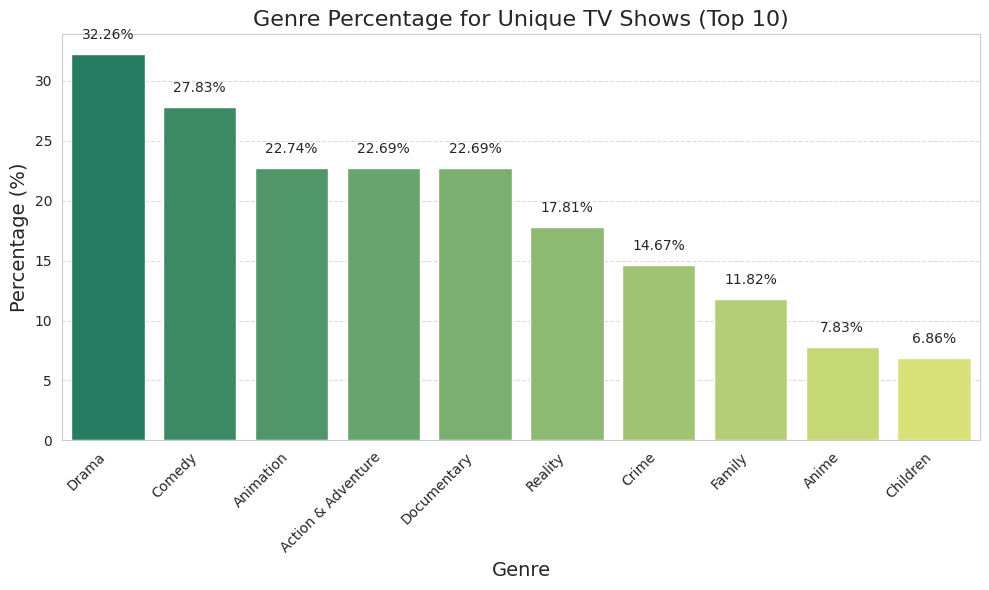

In [ ]:
# Sort the genre_percentage DataFrame by percentage in descending order and select the top 10 genres
top_10_genres = genre_percentage.sort_values(ascending=False).head(10)

# Set plot style
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")

# Plot the bar chart using seaborn
ax = sns.barplot(x=top_10_genres.index, y=top_10_genres.values, palette='summer')  # Use 'summer' palette

# Set titles and labels
plt.title('Genre Percentage for Unique TV Shows (Top 10)', fontsize=16)
plt.xlabel('Genre', fontsize=14)
plt.ylabel('Percentage (%)', fontsize=14)

# Rotate x-axis labels
plt.xticks(rotation=45, ha='right')

# Add grid lines
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add labels on top of each bar
for bar, value in zip(ax.patches, top_10_genres.values):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 1, f'{value:.2f}%', ha='center', va='bottom', fontsize=10)

# Show plot
plt.tight_layout()
plt.show()

### Tag Percentage

In [ ]:
# Check the unique tags on each platform
df_unique_tag = top_20_platform_df.drop_duplicates(subset=['Title', 'Tag'])

In [ ]:
# Flatten the lists in the 'Tag' column and extract individual tags
tags = [set(re.findall(r"'([^']*)'", str(tag))) for tag in df_unique_tag['Tag']]

# Flatten the list of sets and remove empty strings
flattened_tags = [tag for sublist in tags for tag in sublist if tag.strip()]

# Count the occurrences of each tag
tag_counts = pd.Series(Counter(flattened_tags)).reset_index()
tag_counts.columns = ['Tag', 'Count']

# Calculate the total unique count of titles
total_unique_titles = df_unique_tag['Title'].nunique()

# Calculate the percentage of each tag
tag_counts['Percentage'] = (tag_counts['Count'] / total_unique_titles) * 100

# Print the results
print(tag_counts)

            Tag  Count  Percentage
0       Teacher     23    0.278080
1          Drug     71    0.858421
2        Doctor    199    2.405997
3      Gangster     55    0.664974
4   High School    148    1.789385
..          ...    ...         ...
86       Jungle      5    0.060452
87      Hunting      5    0.060452
88        Short      9    0.108814
89    Christmas      5    0.060452
90        Egypt      4    0.048362

[91 rows x 3 columns]


<ipython-input-43-a5037559702c>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Tag', y='Percentage', data=top_tags, palette='summer')


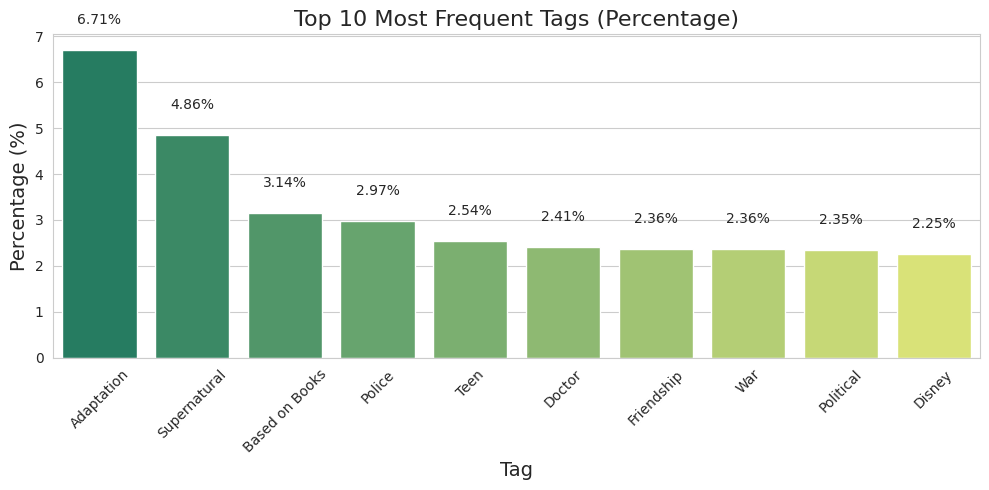

In [ ]:
# Sort the tag counts by frequency and select the top 10
top_tags = tag_counts.sort_values(by='Count', ascending=False).head(10)

# Set the style
plt.figure(figsize=(10, 5))
sns.set_style("whitegrid")

# Plot the bar chart for percentages
ax = sns.barplot(x='Tag', y='Percentage', data=top_tags, palette='summer')
ax.set_xlabel('Tag', fontsize=14)  # Increase font size
ax.set_ylabel('Percentage (%)', fontsize=14)  # Increase font size
ax.set_title('Top 10 Most Frequent Tags (Percentage)', fontsize=16)  # Increase font size

# Rotate x-axis labels
plt.xticks(rotation=45)  # Rotate xticks by 45 degrees

# Add labels on top of each bar
for bar, value in zip(ax.patches, top_tags['Percentage']):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height + 0.5, f'{value:.2f}%', ha='center', va='bottom', fontsize=10)

# Show the plot
plt.tight_layout()
plt.show()

### Netflix Data - Production Country

In [ ]:
df_netflix = pd.read_csv('/content/drive/MyDrive/DSO 574/Assignment 3/Database/Netflix catalogue USA 2016-2020.csv')

<ipython-input-44-aff3c48addc7>:1: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  df_netflix = pd.read_csv('/content/drive/MyDrive/DSO 574/Assignment 3/Database/Netflix catalogue USA 2016-2020.csv')


In [ ]:
df_netflix = df_netflix.loc[df_netflix['Content Type'] == 'TVSeason']

In [ ]:
df_netflix['YearMonth'] = pd.to_datetime(df_netflix['YearMonth'], format = '%b-%Y', errors = 'coerce')

In [ ]:
df_netflix['Year'] = df_netflix['YearMonth'].dt.year

In [ ]:
df_netflix = df_netflix.drop_duplicates(subset = ['YearMonth', 'Title'])

In [ ]:
df_netflix.head()

,YearMonth,Platform,Country,Content Type,Title,First Release Year,Primary Genre,SecondaryGenre,Genre,Duration,Duration Group,Number of Episodes,Primary Production Country,Primary Production Company,Year
3,2016-01-01,Netflix,USA,TVSeason,#deathtoselfie With Steven Furtick: Season 1,2014,Miscellaneous,Miscellaneous,Miscellaneous - Miscellaneous,520,45 - 60 minutes,10,USA,No Company Assigned,2016
16,2016-01-01,Netflix,USA,TVSeason,3rd Rock From the Sun: Season 1,1996,Sci-Fi & Fantasy,Comedy,Sci-Fi & Fantasy - Comedy,420,15 - 30 minutes,20,USA,Carsey-Werner Company,2016
17,2016-01-01,Netflix,USA,TVSeason,3rd Rock From the Sun: Season 2,1996,Sci-Fi & Fantasy,Comedy,Sci-Fi & Fantasy - Comedy,546,15 - 30 minutes,26,USA,Carsey-Werner Company,2016
18,2016-01-01,Netflix,USA,TVSeason,3rd Rock From the Sun: Season 3,1997,Sci-Fi & Fantasy,Comedy,Sci-Fi & Fantasy - Comedy,567,15 - 30 minutes,27,USA,Carsey-Werner Company,2016
19,2016-01-01,Netflix,USA,TVSeason,3rd Rock From the Sun: Season 4,1998,Sci-Fi & Fantasy,Comedy,Sci-Fi & Fantasy - Comedy,504,15 - 30 minutes,24,USA,Carsey-Werner Company,2016


In [ ]:
production_country = df_netflix.groupby(['Year', 'Primary Production Country']).size().unstack(fill_value=0)
production_country = round(production_country / 12)
production_country

Primary Production Country,Argentina,Australia,Bahrain,Belgium,Brazil,Canada,Chile,China,Colombia,Croatia,...,Spain,Sweden,Switzerland,Taiwan,Thailand,Turkey,UAE,UK,USA,Ukraine
Year,,,,,,,,,,,,,,,,,,,,,
2016,7.0,55.0,0.0,1.0,6.0,138.0,4.0,8.0,22.0,0.0,...,19.0,4.0,0.0,2.0,0.0,3.0,0.0,353.0,1474.0,0.0
2017,8.0,81.0,1.0,3.0,7.0,171.0,8.0,27.0,18.0,0.0,...,27.0,4.0,1.0,6.0,1.0,28.0,0.0,413.0,1328.0,2.0
2018,6.0,91.0,1.0,3.0,9.0,184.0,4.0,34.0,14.0,0.0,...,42.0,4.0,0.0,7.0,10.0,28.0,0.0,488.0,1293.0,3.0
2019,16.0,98.0,1.0,6.0,20.0,175.0,5.0,69.0,21.0,2.0,...,59.0,5.0,1.0,28.0,60.0,34.0,1.0,435.0,1434.0,5.0
2020,20.0,90.0,1.0,10.0,31.0,163.0,4.0,86.0,24.0,2.0,...,69.0,8.0,1.0,38.0,74.0,34.0,1.0,340.0,1552.0,3.0


In [ ]:
# Sum the occurrences for each country across all years
total_occurrences_by_country = production_country.sum()

# Get the top 10 countries with the highest total occurrences
top_countries_all_time = total_occurrences_by_country.nlargest(20)

# Print or use top_countries_all_time as needed
print(top_countries_all_time)

Primary Production Country
USA            7081.0
UK             2029.0
Canada          831.0
Japan           723.0
South Korea     428.0
Australia       415.0
France          258.0
India           226.0
China           224.0
Spain           216.0
Mexico          209.0
Thailand        145.0
Turkey          127.0
Colombia         99.0
Germany          99.0
Malaysia         82.0
Taiwan           81.0
Italy            75.0
Brazil           73.0
Denmark          73.0
dtype: float64


In [ ]:
# Calculate the percentage of value in each cell relative to the total count for each year (row)
marketshare_by_country = (production_country.div(production_country.sum(axis=1), axis=0) * 100).round(1).astype(str) + '%'

# Reorder the columns in the DataFrame based on the order of top countries
marketshare_by_country = marketshare_by_country[top_countries_all_time.index]

marketshare_by_country

Primary Production Country,USA,UK,Canada,Japan,South Korea,Australia,France,India,China,Spain,Mexico,Thailand,Turkey,Colombia,Germany,Malaysia,Taiwan,Italy,Brazil,Denmark
Year,,,,,,,,,,,,,,,,,,,,
2016,62.2%,14.9%,5.8%,3.7%,1.1%,2.3%,1.7%,0.4%,0.3%,0.8%,1.6%,0.0%,0.1%,0.9%,0.5%,0.0%,0.1%,0.4%,0.3%,0.4%
2017,53.1%,16.5%,6.8%,3.6%,2.7%,3.2%,1.7%,0.9%,1.1%,1.1%,1.3%,0.0%,1.1%,0.7%,0.7%,0.1%,0.2%,0.6%,0.3%,0.6%
2018,48.5%,18.3%,6.9%,4.6%,2.9%,3.4%,1.7%,1.4%,1.3%,1.6%,1.5%,0.4%,1.0%,0.5%,0.6%,0.1%,0.3%,0.6%,0.3%,0.6%
2019,45.5%,13.8%,5.5%,5.7%,3.0%,3.1%,1.8%,2.4%,2.2%,1.9%,1.6%,1.9%,1.1%,0.7%,0.7%,1.2%,0.9%,0.5%,0.6%,0.5%
2020,45.4%,9.9%,4.8%,7.1%,4.7%,2.6%,2.1%,2.4%,2.5%,2.0%,1.4%,2.2%,1.0%,0.7%,1.0%,1.2%,1.1%,0.5%,0.9%,0.5%


In [ ]:
# Calculate the percentage of value in each cell relative to the total count for each year
average_production_country_by_year_percentage = (production_country.div(production_country.sum(axis=1), axis=0) * 100).round(1).astype(str) + '%'

# Extract percentage values for 2016 and 2020
percentage_values_2016 = average_production_country_by_year_percentage.loc[2016].str.rstrip('%').astype(float)
percentage_values_2020 = average_production_country_by_year_percentage.loc[2020].str.rstrip('%').astype(float)

# Calculate the differences between 2020 and 2016 for each country
differences_by_country_percentage = percentage_values_2020 - percentage_values_2016

# Get the highest positive and negative differences for each country
highest_positive_difference_by_country = differences_by_country_percentage[differences_by_country_percentage > 0].sort_values(ascending=False)
highest_negative_difference_by_country = differences_by_country_percentage[differences_by_country_percentage < 0].sort_values(ascending=True)

# Print the results
print("Highest positive difference by country:")
print(highest_positive_difference_by_country)
print("\nHighest negative difference by country:")
print(highest_negative_difference_by_country)


Highest positive difference by country:
Primary Production Country
South Korea            3.6
Japan                  3.4
China                  2.2
Thailand               2.2
India                  2.0
Spain                  1.2
Malaysia               1.2
Taiwan                 1.0
Turkey                 0.9
Brazil                 0.6
Singapore              0.6
Germany                0.5
France                 0.4
Australia              0.3
Israel                 0.3
Argentina              0.3
Belgium                0.3
Egypt                  0.3
Finland                0.2
Hong Kong              0.2
Nigeria                0.2
No Country Assigned    0.2
Russia                 0.2
Norway                 0.1
Poland                 0.1
Croatia                0.1
Czech Republic         0.1
Ukraine                0.1
Saudi Arabia           0.1
Pakistan               0.1
Lebanon                0.1
Kuwait                 0.1
Ireland                0.1
Denmark                0.1
Italy          

In [ ]:
growth_positive_by_country = marketshare_by_country[highest_positive_difference_by_country.nlargest(5).index]
growth_negtive_by_country = marketshare_by_country[highest_negative_difference_by_country.nsmallest(5).index]

In [ ]:
growth_positive_by_country

Primary Production Country,South Korea,Japan,China,Thailand,India
Year,,,,,
2016,1.1%,3.7%,0.3%,0.0%,0.4%
2017,2.7%,3.6%,1.1%,0.0%,0.9%
2018,2.9%,4.6%,1.3%,0.4%,1.4%
2019,3.0%,5.7%,2.2%,1.9%,2.4%
2020,4.7%,7.1%,2.5%,2.2%,2.4%


In [ ]:
growth_negtive_by_country

Primary Production Country,USA,UK,Canada,Mexico,Colombia
Year,,,,,
2016,62.2%,14.9%,5.8%,1.6%,0.9%
2017,53.1%,16.5%,6.8%,1.3%,0.7%
2018,48.5%,18.3%,6.9%,1.5%,0.5%
2019,45.5%,13.8%,5.5%,1.6%,0.7%
2020,45.4%,9.9%,4.8%,1.4%,0.7%
